In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.decomposition import TruncatedSVD

In [ ]:
#Read dataset to pandas dataframe
dataset = pd.read_excel('/content/drive/MyDrive/MTP_Final/Chilikaujainiukai_Inland_Water/CHILIKAUJANI.xlsx')

In [ ]:
dataset_y=dataset['Chlorophyll']
dataset_x=dataset.drop(['Chlorophyll','Site'],axis=1)

In [ ]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(dataset_x)) #scaling the data
scaled_data
scaled_data.columns.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
scaled_data = scaled_data.to_numpy()

In [ ]:
svd =  TruncatedSVD(n_components = 3)
scaled_data_df = svd.fit_transform(scaled_data)

In [ ]:
scaled_data_df

array([[ 9.49786697e+00,  8.09651630e+00,  7.94492274e+00],
       [ 1.64861880e+01,  1.54025949e+01, -5.34595894e+00],
       [ 1.84796064e+01,  1.46657047e+01, -2.40514489e+00],
       [ 6.22200607e+00, -2.46041135e-01, -2.39792807e+00],
       [-1.76894875e+01,  1.93846796e+00, -2.44582270e+00],
       [-1.83008191e+01,  1.54279919e+00, -2.32888303e+00],
       [-1.76353519e+01, -1.72984060e+00, -1.21029573e-01],
       [-1.77350454e+01, -2.18610413e+00,  1.99881708e-01],
       [-1.79246583e+01, -2.01698866e+00,  1.38628647e-01],
       [-2.07293858e+01, -1.11853724e+00,  1.11285327e+00],
       [-1.93635988e+01, -1.57298700e+00,  5.52038673e-02],
       [-1.78272737e+01, -2.50174757e+00,  3.23587755e-01],
       [-1.80980027e+01, -2.04514201e+00,  2.07914493e-01],
       [-1.81277844e+01, -1.98175478e+00,  1.20608465e-01],
       [ 1.18267251e+01, -7.45130993e-01,  1.34587198e+00],
       [ 3.13626883e+01, -6.34235875e+00, -1.71146614e+00],
       [ 4.15990302e+01, -9.91441570e+00

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data_df, dataset_y, test_size = 0.3, random_state = 0)

                  **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(X_train, y_train)
r_sq = model_lr.score(X_train, y_train)
y_predicted_lr = model_lr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_square = model_lr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_lr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_lr)
print(mape)

6.558129346423167
0.22581231510873456
5.62697530092023
0.506063206282981


            **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor().fit(X_train, y_train)
y_predicted_gb = model_gb.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_gb))
print(rms)
r_square = model_gb.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_gb)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_gb)
print(mape)

7.4891236767204665
-0.009597596289225185
6.249859459314952
0.3995898869828373


In [ ]:
#Hyperparameter tuning
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.001,
 'max_depth': 4,
 'n_estimators': 2000,
 'random_state': 1,
 'subsample': 0.5}

In [ ]:
GBR2 = GradientBoostingRegressor(n_estimators=2000,learning_rate=0.001,subsample=0.5,max_depth=4,random_state=1)
model_gbhp = GBR2.fit(X_train, y_train)
y_predicted_gbhp = model_gbhp.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_gbhp))
print(rms)
r_square = model_gbhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_gbhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_gbhp)
print(mape)

5.177876763364192
0.5173973280406123
4.227789416002267
0.32484662155909455


                  **PLS Regression**

In [ ]:
from sklearn.cross_decomposition import PLSRegression
model_plsr = PLSRegression(n_components=41, scale=True)
model_plsr.fit(X_train, y_train)
y_predicted_plsr = model_plsr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_plsr))
print(rms)
r_square = model_plsr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_plsr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_plsr)
print(mape)

6.558129346423167
0.22581231510873434
5.626975300920232
0.5060632062829811


In [ ]:
#Hyperparameter Tuning
r_square = []
rms = [] #to store rmse values for different n_components
mae = []
mape = []
for n_comp in range(1, 41):
  model_plsrhp = PLSRegression(n_components=n_comp, scale=True)
  model_plsrhp.fit(X_train, y_train)
  y_predicted_plsrhp = model_plsrhp.predict(X_test)
  rms_val = sqrt(mean_squared_error(y_test,y_predicted_plsrhp)) #calculate rmse
  rms.append(rms_val) #store rmse values
  r2 = model_plsrhp.score(X_test,y_test)
  r_square.append(r2) #store r2 values
  mae_1 = mean_absolute_error(y_test,y_predicted_plsrhp)
  mae.append(mae_1)
  mape_1 = mean_absolute_percentage_error(y_test, y_predicted_plsrhp)
  mape.append(mape_1)

In [ ]:
print(min(rms))
print(max(r_square))
print(min(mae))
print(min(mape))

6.501943071463283
0.23902107750035106
5.563682104779143
0.49718773542335354


                **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators = 500)
model_rfr.fit(X_train,y_train)
y_predicted_rfr = model_rfr.predict(X_test) 

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rfr))
print(rms)
r_square = model_rfr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rfr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rfr)
print(mape)
print(model_rfr.get_params())

5.311559519001871
0.4921559046849744
4.4719260325732995
0.3336648424029027
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True],'max_depth': [100, 110],'max_features': [2, 3],'min_samples_leaf': [1,2,3],'min_samples_split': [1,2,3],'n_estimators': [100, 500, 1000]}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_rfrhp = grid_search.best_estimator_
model_rfrhp.fit(X_train,y_train)
y_predicted_rfrhp = model_rfrhp.predict(X_test)  

Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rfrhp))
print(rms)
r_square = model_rfrhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rfrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rfrhp)
print(mape)

5.135464462556428
0.5252710037296189
4.193094743206086
0.30290378359736253


                        **KNN**

In [ ]:
from sklearn import neighbors
r_square = []
rms = []
mae = []
mape = []
 #to store rmse values for different k
for K in range(20):
    K = K+1
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(X_train, y_train)  #fit the model
    y_predicted_knn = model_knn.predict(X_test) #make prediction on test set
    rms_val = sqrt(mean_squared_error(y_test,y_predicted_knn)) #calculate rmse
    rms.append(rms_val) #store rmse values
    r2 = model_knn.score(X_test,y_test)
    r_square.append(r2) #store r2 values
    mae_1 = mean_absolute_error(y_test,y_predicted_knn)
    mae.append(mae_1)
    mape_1 = mean_absolute_percentage_error(y_test, y_predicted_knn)
    mape.append(mape_1)

In [ ]:
print(min(rms))
print(max(r_square))
print(min(mae))
print(min(mape))

5.442997117709829
0.4667111405299881
4.031319005530304
0.389170147981273


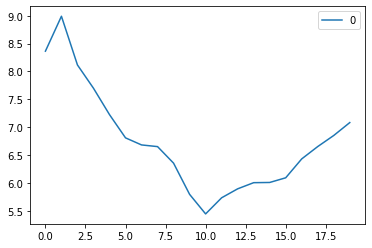

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rms) #elbow curve 
curve.plot()

                       **SVR**

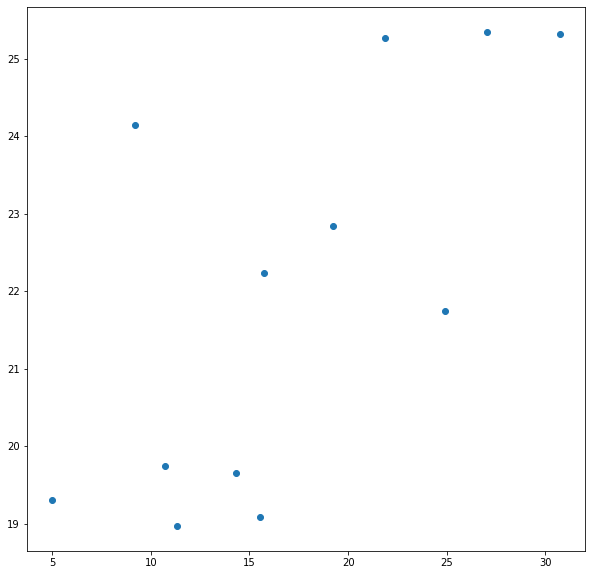

In [ ]:
from sklearn.svm import SVR
model_svr = SVR(kernel = 'rbf')
model_svr.fit(X_train, y_train)
y_predicted_svr = model_svr.predict(X_test)
plt.figure(figsize = (10,10))
plt.scatter(y_test,y_predicted_svr)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_svr))
print(rms)
r_square = model_svr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_svr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_svr)
print(mape)

7.731784022019048
-0.07608290140801555
6.544617576978976
0.6429224436453828


In [ ]:
#Hyperparameter Tuning
c_range = np.logspace(-3, 3, 5)
gamma_range = np.logspace(-3, 3, 5)
parameters = {'kernel': ['rbf'], 'C': c_range,'gamma': gamma_range,'epsilon':[1,0.1,0.01,0.001,0.0001,0.00001,0.000001]}
svr = SVR()
grid_search = GridSearchCV(svr, parameters)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'C': 31.622776601683793, 'epsilon': 1, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}


In [ ]:
model_svrhp = grid_search.best_estimator_
model_svrhp.fit(X_train,y_train)
y_predicted_svrhp = model_svrhp.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_svrhp))
print(rms)
r_square = model_svrhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_svrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_svrhp)
print(mape)

5.212294838613741
0.5109601487905631
3.939658300204318
0.2724230332090144


                   ** Adaboost Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model_abr = AdaBoostRegressor().fit(X_train, y_train)
y_predicted_abr = model_abr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_abr))
print(rms)
r_square = model_abr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_abr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_abr)
print(mape)
print(model_abr.get_params())

6.452730072747446
0.2504971317178979
5.521692053720238
0.3788928341542399
{'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': None}


In [ ]:
#Hyperparametrer Tuning
param_grid = {'n_estimators':list(range(0, 1000, 100)), 'learning_rate':[100,10,1,0.1, 0.01, 0.001,0.0001,0.00001]}
grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=1, cv=5)

In [ ]:
#fit the data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model_adbhp = grid_search.best_estimator_
model_adbhp.fit(X_train,y_train)
y_predicted_abrhp = model_adbhp.predict(X_test) 

{'learning_rate': 0.0001, 'n_estimators': 400}


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_abrhp))
print(rms)
r_square = model_adbhp.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_abrhp)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_abrhp)
print(mape)

6.966736712320699
0.12633467666840426
5.934564094930555
0.3922676707318918


               **Ridge**

In [ ]:
#Ridge Regression, using Grid Search CV to find the best parameter for alpha
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regression.best_params_)

{'alpha': 20}


In [ ]:
model_rr = Ridge(alpha=20).fit(X_train,y_train)
y_predicted_rr = model_rr.predict(X_test)

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_rr))
print(rms)
r_square = model_rr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_rr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_rr)
print(mape)

6.529514172346965
0.2325536228314693
5.585895856369852
0.5061315396534797


              **Lasso**

In [ ]:
#Lasso Regression, using Grid Search CV to find the best parameter for alpha
from sklearn.linear_model import Lasso
lasso = Lasso()
a = [0.000000000000000000000000001*(10)**i for i in range(100)]
parameters = {"alpha":a}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-27, 1e-26, 1e-25, 1.0000000000000001e-24,
                                   1.0000000000000001e-23, 1e-22,
                                   1.0000000000000001e-21,
                                   1.0000000000000001e-20,
                                   1.0000000000000001e-19, 1e-18, 1e-17, 1e-16,
                                   1e-15, 1e-14, 1e-13, 1e-12,
                                   1.0000000000000001e-11, 1e-10, 1e-09, 1e-08,
                                   1.0000000000000001e-07, 1e-06, 1e-05,
                                   9.999999999999999e-05, 0.001,
                                   0.010000000000000002, 0.1, 1.0, 10.0, 100.0, ...]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regression.best_params_)

{'alpha': 10.0}


In [ ]:
rms = sqrt(mean_squared_error(y_test, y_predicted_lr))
print(rms)
r_square = model_lr.score(X_test,y_test)
print(r_square)
mae = mean_absolute_error(y_test,y_predicted_lr)
print(mae)
mape = mean_absolute_percentage_error(y_test, y_predicted_lr)
print(mape)

6.558129346423167
0.22581231510873456
5.62697530092023
0.506063206282981
